Pivot Table
=========

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Basics
-------

In [2]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [3]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [5]:
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [7]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', 'age'], 'class')

class            First    Second     Third
sex    age                                
female 0.75        NaN       NaN  1.000000
       1.00        NaN       NaN  1.000000
       2.00   0.000000  1.000000  0.250000
       3.00        NaN  1.000000  0.000000
       4.00        NaN  1.000000  1.000000
       5.00        NaN  1.000000  1.000000
       6.00        NaN  1.000000  0.000000
       7.00        NaN  1.000000       NaN
       8.00        NaN  1.000000  0.000000
       9.00        NaN       NaN  0.000000
       10.00       NaN       NaN  0.000000
       11.00       NaN       NaN  0.000000
       13.00       NaN  1.000000  1.000000
       14.00  1.000000  1.000000  0.500000
       14.50       NaN       NaN  0.000000
       15.00  1.000000       NaN  1.000000
       16.00  1.000000       NaN  0.666667
       17.00  1.000000  1.000000  0.500000
       18.00  1.000000  1.000000  0.375000
       19.00  1.000000  1.000000  1.000000
       20.00       NaN       NaN  0.000000
       21.00  1.000000  1.000000  0.250000
       22.00  1.000000  1.000000  0.666667
       23.00  1.000000  1.000000  0.500000
       24.00  1.000000  0.857143  0.750000
       25.00  0.000000  1.000000  0.000000
       26.00  1.000000  0.000000  0.666667
       27.00       NaN  0.666667  1.000000
       28.00       NaN  1.000000  0.000000
       29.00  1.000000  1.000000  0.333333
...                ...       ...       ...
male   42.00  0.666667  0.333333  0.000000
       43.00       NaN  0.000000  0.000000
       44.00  0.000000  0.000000  0.250000
       45.00  0.250000       NaN  0.500000
       45.50  0.000000       NaN  0.000000
       46.00  0.000000  0.000000       NaN
       47.00  0.000000  0.000000  0.000000
       48.00  1.000000  0.000000  0.000000
       49.00  0.666667       NaN  0.000000
       50.00  0.333333  0.000000  0.000000
       51.00  0.500000  0.000000  0.000000
       52.00  0.500000  0.000000       NaN
       54.00  0.000000  0.000000       NaN
       55.00  0.000000       NaN       NaN
       55.50       NaN       NaN  0.000000
       56.00  0.333333       NaN       NaN
       57.00       NaN  0.000000       NaN
       58.00  0.000000       NaN       NaN
       59.00       NaN  0.000000  0.000000
       60.00  0.500000  0.000000       NaN
       61.00  0.000000       NaN  0.000000
       62.00  0.000000  1.000000       NaN
       64.00  0.000000       NaN       NaN
       65.00  0.000000       NaN  0.000000
       66.00       NaN  0.000000       NaN
       70.00  0.000000  0.000000       NaN
       70.50       NaN       NaN  0.000000
       71.00  0.000000       NaN       NaN
       74.00       NaN       NaN  0.000000
       80.00  1.000000       NaN       NaN

[145 rows x 3 columns]

In [10]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (18, 80]              NaN  1.000000  0.714286          0.909091   
       NaN                   NaN  0.880000  0.444444          0.972973   
male   (18, 80]              NaN  0.000000  0.260870          0.800000   
       NaN                   0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (18, 80]  1.000000  0.318182  
       NaN       0.914286  0.391304  
male   (18, 80]  0.818182  0.178571  
       NaN       0.030303  0.192308

In [11]:
titanic.pivot_table(index = 'sex', columns = 'class',
                   aggfunc = {'survived' : sum, 'fare' : 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [12]:
titanic.pivot_table('survived', index = 'sex', columns = 'class', margins = True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


Example : Birthrate Data
    -----------

In [13]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [15]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


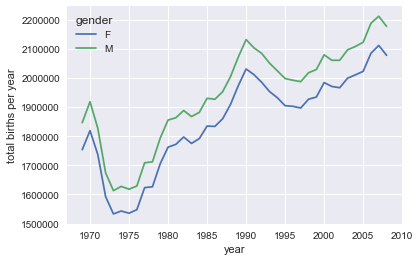

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel('total births per year');

In [19]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month +
                             births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

Text(0,0.5,'mean births by day')

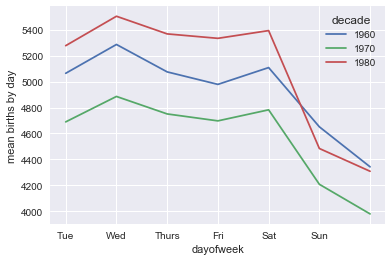

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index = 'dayofweek',
                  columns = 'decade', aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [23]:
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [24]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


In [ ]:
fig, ax = plt.subplots(fi)